# Getting the optimal local Fourier approximation for MV-SDE

add description here

### Initialising libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

from brownian_motion import simulate_dW, simulate_dW_1d, transform_dW
from kuramoto_true import SDE_Kuramoto_MV
from kuramoto_appr import SDE_Kuramoto_MV_appr
from algorithm import SGD_MV

## McKean-Vlasov SDE of Kuramoto's type.

### We initialise the main class and test it.

We initialise the class of MV-SDE that admits the following dynamics:

$$
\text{d}X_t = \mathbb{E}[\sin(X_t-x)]_{\big|x = X_t}~\text{d}t + \sigma ~\text{d}W_t, \quad X_0 = x_0 \in L_2(\Omega).
$$

The drift can be equivalently rewritten as

$$
\mathbb{E}[\sin(X_t)] \cos(X_t) - \mathbb{E}[\cos(X_t)] \sin(X_t).
$$

Try for drift


$$
\mathbb{E}[\sin(X_t)] \cos(X_t)
$$


# add the bits on the gradient

## ***write on approximation***

## Testing the variance of $\gamma$.

In [3]:
n_discr_test = 10

N_iter = 10000
eta = 0.01

x_0 = 1
sigma = 1
alpha = - 0.5
beta = 0.3
T = 0.2

f = open(f"output/Kuramoto/gamma_n_discr_{n_discr_test}_N_iter_{N_iter}_T_{T}_{time.time()}.txt", "w+")

SGD_Kuramoto = SGD_MV(x_0 = x_0, sigma = sigma, alpha = alpha, beta = beta, T = T)

gamma_starting = np.zeros((2,n_discr_test))
gamma_starting[0][0] = np.sin(x_0)
gamma_starting[1][0] = - np.cos(x_0)
gamma_starting[:,1:] = np.random.uniform(low = - 0.3, high = 0.3, size = (2,n_discr_test - 1))

gammas_cyclical = []

for i in range(10):
    gamma = SGD_Kuramoto.kuramoto_get_gamma(n_discr = n_discr_test, eta = eta, gamma = gamma_starting, eps = 1e-5, N_iter = N_iter, cyclic_lr = True)
    print(f'Gamma from the algorithm is \n{gamma}.')
    f.write(f'\tGamma for n_discr = {n_discr_test}, eta = {eta}, eps = {1e-5}, N_iter = {N_iter}, cyclic_lr = {True}, is \n\n \t\t{gamma}\n\n')
    f.write('=========================================================================================================\n')
    gammas_cyclical.append(gamma)
    
f.close()

Solved for 8.074 seconds.
Gamma from the algorithm is 
[[ 0.84138685  0.82973692  0.8333586   0.83336472  0.83743527  0.83274336
   0.83313556  0.82901717  0.82821588  0.83127984]
 [-0.54024828 -0.51293283 -0.49486391 -0.47163019 -0.45399634 -0.43263224
  -0.41527369 -0.39189734 -0.37413278 -0.35667584]].
Solved for 8.039 seconds.
Gamma from the algorithm is 
[[ 0.84138685  0.83376495  0.83797996  0.83511656  0.83802075  0.83190901
   0.83104293  0.82719296  0.82577292  0.82829693]
 [-0.54024828 -0.50684571 -0.4875481  -0.46760563 -0.44888008 -0.42923668
  -0.41481782 -0.39231688 -0.37769204 -0.35931857]].
Solved for 8.028 seconds.
Gamma from the algorithm is 
[[ 0.84138685  0.83082474  0.83595221  0.83446324  0.83641527  0.83158831
   0.83154514  0.82883731  0.82922191  0.83235535]
 [-0.54024828 -0.51008598 -0.48805357 -0.46728315 -0.45149738 -0.43025818
  -0.41494851 -0.39156106 -0.37374108 -0.35299309]].
Solved for 8.095 seconds.
Gamma from the algorithm is 
[[ 0.84138685  0.8307373

### We save the average of the SGD gammas to use further in the benchmark.

In [7]:
gamma_average_sgd = np.mean(gammas_cyclical, axis = 0)
print(f'Average gamma is {gamma_average_sgd}')

Average gamma is [[ 0.84138685  0.83164331  0.83674758  0.83480799  0.8383552   0.83367576
   0.83314862  0.82933649  0.82831128  0.8314727 ]
 [-0.54024828 -0.50994023 -0.48870447 -0.46794798 -0.44908785 -0.42777345
  -0.41192644 -0.38904474 -0.37336066 -0.35412195]]


## Gamma benchmark: comparison of the average of the gammas obtained through SGD and gamma of the MC estimate of the particles system.

In [8]:
print(f'Average gamma from the algorithm is \n{gamma_average_sgd}.\n')

n_discr_high = 50
n_part = 10000

dW_t = simulate_dW((n_part,n_discr_high),T = T)
X_true = SDE_Kuramoto_MV(x_0 = x_0, sigma = sigma, dW_t = dW_t, T = T, n_discr = n_discr_high, n_part = n_part)

gammas_part_1, gammas_part_2 = np.sin(X_true.x), - np.cos(X_true.x) 

# Taking the mean across particles (first dimension) and getting benchmark values
gamma_benchmark_1 = np.mean(gammas_part_1, axis = 0)
gamma_benchmark_2 = np.mean(gammas_part_2, axis = 0)

# Form the benchmark gamma 2d shape
gamma_benchmark = np.zeros((2,n_discr_high))
gamma_benchmark[0] = gamma_benchmark_1
gamma_benchmark[1] = gamma_benchmark_2

print(f'Gamma benchmark is \n{gamma_benchmark}.\n')

# print(f'The error is {gamma_average_sgd - gamma_benchmark}.\n')
# print(f'The maximum norm is {abs(gamma_average_sgd - gamma_benchmark).max()}\n')


Average gamma from the algorithm is 
[[ 0.84138685  0.83164331  0.83674758  0.83480799  0.8383552   0.83367576
   0.83314862  0.82933649  0.82831128  0.8314727 ]
 [-0.54024828 -0.50994023 -0.48870447 -0.46794798 -0.44908785 -0.42777345
  -0.41192644 -0.38904474 -0.37336066 -0.35412195]].

Gamma benchmark is 
[[ 0.84147098  0.84023603  0.83848847  0.83766377  0.83627886  0.8345909
   0.83326255  0.83176058  0.82978649  0.82760145  0.82630297  0.82457765
   0.82295089  0.82127606  0.8204804   0.81880808  0.81733767  0.81638461
   0.81455931  0.81274613  0.81137228  0.81014167  0.80819072  0.80702033
   0.80617426  0.80481159  0.80353862  0.80230297  0.80088431  0.79962796
   0.79842605  0.79721507  0.79555887  0.79458831  0.79339091  0.79224239
   0.79088225  0.79000208  0.78877884  0.78678742  0.7859148   0.78467749
   0.78364873  0.7820977   0.78129055  0.7806329   0.7790934   0.77789777
   0.77703901  0.77589417]
 [-0.54030231 -0.5385142  -0.5374932  -0.53524346 -0.53390192 -0.5330600

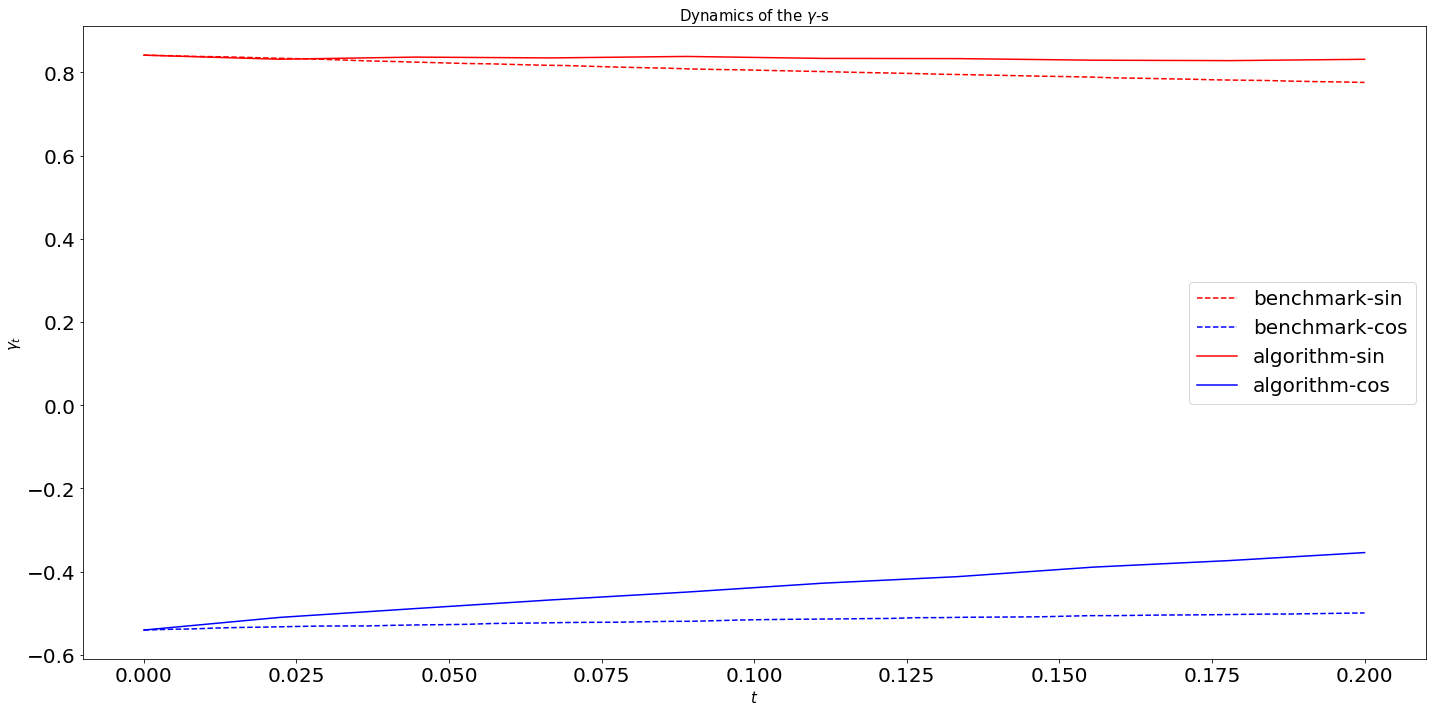

In [9]:
t_benchmark = np.linspace(0,T,n_discr_high)
t_sgd = np.linspace(0,T,n_discr_test)

fig, ax = plt.subplots(1,1, figsize = (20, 10), tight_layout=True)

ax.set_title(r"Dynamics of the $\gamma$-s", fontsize = 15)
ax.set_xlabel(r'$t$',fontsize = 15)
ax.set_ylabel(r'$\gamma_t$',fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize = 20)
ax.tick_params(axis='both', which='minor', labelsize = 20)

ax.plot(t_benchmark, gamma_benchmark[0], 'r--', label = 'benchmark-sin')
ax.plot(t_benchmark, gamma_benchmark[1], 'b--', label = 'benchmark-cos')
ax.plot(t_sgd, gamma_average_sgd[0], c = 'r', label = 'algorithm-sin')
ax.plot(t_sgd, gamma_average_sgd[1], c = 'b', label = 'algorithm-cos')

ax.legend(loc = 'best', fontsize = 20)

plt.show()

## Miscellaneous

In [ ]:
n_discr_test = [2,5,10]
etas_test = [0.1,0.05,0.01,0.005,0.001]
N_iter_test = [100,200,500,1000,5000,10000]
tol_test = [0.1,0.05,0.01,0.005,0.001]

x_0 = 1

gamma_starting = np.zeros((2,100))
gamma_starting[0][0] = np.sin(x_0)
gamma_starting[1][0] = - np.cos(x_0)
gamma_starting[:,1:] = np.random.uniform(low = - 0.3, high = 0.3, size = (2,100 - 1))

for n_discr_i in range(len(n_discr_test)):
    for eta_i in range(len(etas_test)):
        
        fig, ax = plt.subplots(len(N_iter_test),len(tol_test),figsize=(40, 30), tight_layout=True)
        t_high = np.linspace(0,T,n_discr_high)
        for N_iter_i in range(len(N_iter_test)):
            for tol_i in range(len(tol_test)):
                gamma_starting_local = np.zeros((2,n_discr_test[n_discr_i]))
                #print(n_discr_test[n_discr_i])
                gamma_starting_local[0] = gamma_starting[0][::100 // n_discr_test[n_discr_i]]
                gamma_starting_local[1] = gamma_starting[1][::100 // n_discr_test[n_discr_i]]

                gamma_sol = SGD_MV(n_discr = n_discr_test[n_discr_i], eta = etas_test[eta_i], gamma = gamma_starting_local, T = 0.2, eps = tol_test[tol_i], N_iter = N_iter_test[N_iter_i], key = 'kuramoto')

                print(f'For n_discr = {n_discr_test[n_discr_i]}, eta = {etas_test[eta_i]}, N_iter = {N_iter_test[N_iter_i]}, tol = {tol_test[tol_i]} the gamma is \n {gamma_sol}. \n\n')
                
                ax[N_iter_i][tol_i].set_title(f"{N_iter_test[N_iter_i]} iterations, {tol_test[tol_i]} tolerance", fontsize = 15)
                ax[N_iter_i][tol_i].set_xlabel(r'$t$',fontsize = 15)
                ax[N_iter_i][tol_i].set_ylabel(r'$\gamma_t$',fontsize = 15)
                ax[N_iter_i][tol_i].tick_params(axis='both', which='major', labelsize = 20)
                ax[N_iter_i][tol_i].tick_params(axis='both', which='minor', labelsize = 20)
                
                t = np.linspace(0,T,n_discr_test[n_discr_i])
                ax[N_iter_i][tol_i].plot(t, gamma_sol[0], c = 'r', label = 'our approximation for gamma[0]')
                ax[N_iter_i][tol_i].plot(t, gamma_sol[1], c = 'b', label = 'our approximation for gamma[1]')
                
                
                ax[N_iter_i][tol_i].plot(t_high, gamma_benchmark[0], 'r--', label = 'benchmark for gamma[0]')
                ax[N_iter_i][tol_i].plot(t_high, gamma_benchmark[1], 'b--', label = 'benchmark for gamma[1]')
        plt.legend(loc = 'best', fontsize = 20)
        plt.show()

In [ ]:
n_discr_test = [20,50]
etas_test = [0.1,0.05,0.01,0.005,0.001]
N_iter_test = [100,200,500,1000,5000,10000]
tol_test = [0.1,0.05,0.01,0.005,0.001]

x_0 = 1

# gamma_starting = np.zeros((2,100))
# gamma_starting[0][0] = np.sin(x_0)
# gamma_starting[1][0] = - np.cos(x_0)
# gamma_starting[:,1:] = np.random.uniform(low = - 0.3, high = 0.3, size = (2,100 - 1))



for n_discr_i in range(len(n_discr_test)):
    for eta_i in range(len(etas_test)):
        
        fig, ax = plt.subplots(len(N_iter_test),len(tol_test),figsize=(40, 30), tight_layout=True)
        t_high = np.linspace(0,T,n_discr_high)
        for N_iter_i in range(len(N_iter_test)):
            for tol_i in range(len(tol_test)):
                gamma_starting_local = np.zeros((2,n_discr_test[n_discr_i]))
                #print(n_discr_test[n_discr_i])
                gamma_starting_local[0] = gamma_starting[0][::100 // n_discr_test[n_discr_i]]
                gamma_starting_local[1] = gamma_starting[1][::100 // n_discr_test[n_discr_i]]

                gamma_sol = SGD_MV(n_discr = n_discr_test[n_discr_i], eta = etas_test[eta_i], gamma = gamma_starting_local, T = 0.2, eps = tol_test[tol_i], N_iter = N_iter_test[N_iter_i], key = 'kuramoto')

                print(f'For n_discr = {n_discr_test[n_discr_i]}, eta = {etas_test[eta_i]}, N_iter = {N_iter_test[N_iter_i]}, tol = {tol_test[tol_i]} the gamma is \n {gamma_sol}. \n\n')
                
                ax[N_iter_i][tol_i].set_title(f"{N_iter_test[N_iter_i]} iterations, {tol_test[tol_i]} tolerance", fontsize = 15)
                ax[N_iter_i][tol_i].set_xlabel(r'$t$',fontsize = 15)
                ax[N_iter_i][tol_i].set_ylabel(r'$\gamma_t$',fontsize = 15)
                ax[N_iter_i][tol_i].tick_params(axis='both', which='major', labelsize = 20)
                ax[N_iter_i][tol_i].tick_params(axis='both', which='minor', labelsize = 20)
                
                t = np.linspace(0,T,n_discr_test[n_discr_i])
                ax[N_iter_i][tol_i].plot(t, gamma_sol[0], c = 'r', label = 'our approximation for gamma[0]')
                ax[N_iter_i][tol_i].plot(t, gamma_sol[1], c = 'b', label = 'our approximation for gamma[1]')
                
                
                ax[N_iter_i][tol_i].plot(t_high, gamma_benchmark[0], 'r--', label = 'benchmark for gamma[0]')
                ax[N_iter_i][tol_i].plot(t_high, gamma_benchmark[1], 'b--', label = 'benchmark for gamma[1]')
        plt.legend(loc = 'best', fontsize = 20)
        plt.show()